<a href="https://colab.research.google.com/github/Hamxea/Multi-label-Classification/blob/master/_Without_Pre_trained_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Label Text Classification of Text Document or News


 ### DATASET

Toxic Comment Classification dataset. a multi-label text classfication data consisting of many wikipedia comments which have been labeled by humans according to their relative toxicity comments labels such as "toxic", "severe_toxic", "obscene", "threat", "insult", and  "identity_hate". The dataset has approximately ~160k observation in total, ~125k with zero labels (toxicity) of any type, and approximately ~35k classified in one or more toxicity categories.




*   Dataset Link: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge





#### DATA CHARACTERISTICS (TRAIN DATASET)
* Number of data points	159571
* Number data points of type toxic	15294
* Number data points of type severe_tocic	1595
* Number data points of type obscene	8449
* Number data points of type threat	478
* Number data points of type insult	7877
* Number data points of type identity_hate	1405
* Observations in one or more class	35098
* Unclassified observation	124473


### Import necessary libraries for the experiment

In [0]:
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 


import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='hamzasharoon', api_key='9le0c8M5GUNRAKyJoIt2')


# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Using TensorFlow backend.
'apt' is not recognized as an internal or external command,
operable program or batch file.


"Double check with Python 3"


### Loading the necessary data files and data Preparation

In [0]:
#from google.colab import files
#uploaded = files.upload()

#from google.colab import drive
#!kaggle competitions download -c Toxic Comment Classification Challenge -p /content/gdrive/My\ Drive/kaggle/Colab Notebooks/Dataset

In [0]:
#Train data
train = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/train.csv')
train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [0]:
train = train.loc[(train['toxic'] == 1) | (train['severe_toxic'] == 1) | (train['obscene'] ==1) | (train['threat'] == 1) | (train['insult'] == 1) | (train['identity_hate'] ==1)]

train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0


### Clean the Train data, specifically remove punctuations

In [0]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in train['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

train['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey what is it\n talk \nWhat is it an exclusi...,1,0,0,0,0,0
16,0007e25b2121310b,Bye \n\nDont look come or think of comming bac...,1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian \n\nArchangel WHi...,1,0,1,0,1,1
43,00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,1,0,1,0,1,0
44,001956c382006abd,Im Sorry \n\nIm sorry I screwed around with so...,1,0,0,0,0,0
51,001dc38a83d420cf,GET FUCKED UP GET FUCKEEED UP GOT A DRINK THA...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,Tony Sidaway is obviously a fistfuckee He love...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Pages deletion You thought I was gone ...,1,0,1,0,0,0


In [0]:
#Test data
df_test = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test.csv')
df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


### Clean the Test data, specifically remove punctuations

In [0]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in df_test['comment_text']:
    
    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)
    
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

df_test['comment_text'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)



df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then youll ...
1,0000247867823ef7,From RfC \n\n The title is fine as it is IMO
2,00013b17ad220c46,\n\n Sources \n\n Zawe Ashton on Lapland —...
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I dont anonymously edit articles at all
5,0001ea8717f6de06,Thank you for understanding I think very highl...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia Such e...
7,000247e83dcc1211,Dear god this site is horrible
8,00025358d4737918,\n Only a fool can believe in such numbers \n...
9,00026d1092fe71cc,Double Redirects \n\n When fixing double red...


In [0]:
df_test_labels = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test_labels.csv')

df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [0]:
test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


### Merge the df_test and test_labels into 1 dataframe (test)

In [0]:
#Merge the df_test and test_labels into 1 dataframe (test)
test = pd.merge(test_labels, df_test, on='id', how='inner')
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding I think very highl...
1,000247e83dcc1211,0,0,0,0,0,0,Dear god this site is horrible
2,0002f87b16116a7f,0,0,0,0,0,0,Somebody will invariably try to add Religion ...
3,0003e1cccfd5a40a,0,0,0,0,0,0,\n\n It says it right there that it IS a type...
4,00059ace3e3e9a53,0,0,0,0,0,0,\n\n Before adding a new product to the list...
5,000663aff0fffc80,0,0,0,0,0,0,this other one from 1897
6,000689dd34e20979,0,0,0,0,0,0,Reason for banning throwing \n\n This articl...
7,000844b52dee5f3f,0,0,0,0,0,0,blocked from editing Wikipedia
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
9,000968ce11f5ee34,0,0,0,0,0,0,Please stop If you continue to vandalize Wikip...


In [0]:
test = test.loc[(test['toxic'] == 1) | (test['severe_toxic'] == 1) | (test['obscene'] ==1) | (test['threat'] == 1) | (test['insult'] == 1) | (test['identity_hate'] ==1)]

test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
24,0013fed3aeae76b7,1,0,1,0,1,1,DJ Robinson is gay as hell he sucks his dick s...
29,0017d4d47894af05,1,0,1,0,1,0,Fuck off you antisemitic cunt
38,001d739c97bc2ae4,1,0,0,0,0,0,How dare you vandalize that page about the HMS...
40,001eff4007dbb65b,1,0,1,0,1,0,No he is an arrogant self serving immature idi...
89,005f47397e07e12f,1,0,0,0,0,0,Eek but shes cute in an earthy kind of way Can...
106,0071940212267fea,1,0,1,0,0,0,Well it sucks to have a university to be nickn...
107,0072b9c3697ab8cc,1,0,1,0,1,0,Argh \n\n Some random idiot deleted the whol...
124,0081b14d79f54b31,1,0,1,1,0,0,we hate america and we are going to bomb the s...
125,00842d1024b19972,1,0,1,0,1,0,Bold textYOU SUCK \n\n \n\n U SUCK HANNAH M...


### Number of records in the train and test data

In [0]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (16225, 8)
Test data shape (6234, 8)


In [0]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values in train data.')
print('The dataset has', test.isna().sum().sum(), 'missing values in test data.')

# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates in train data.')
print('The dataset has', test.duplicated().sum(), 'duplicates in test data.')

The dataset has 0 missing values in train data.
The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.
The dataset has 0 duplicates in test data.


### CORRELATION BETWEEN DATA LABELS

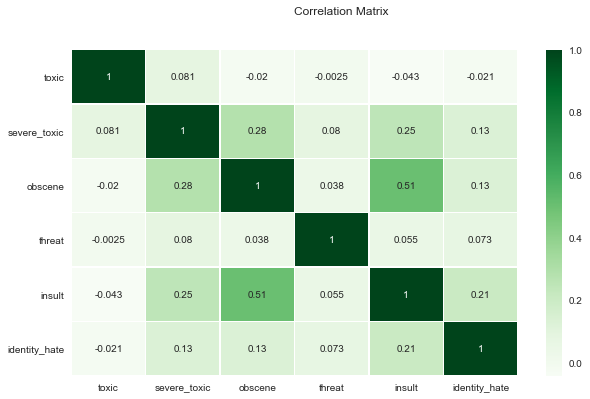

In [0]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

### DATA PREPROCESSING
Deep Neural Networks input layers make use of input variables to feed the network for training the model. But in this task (experiment), we're dealing with words text. How do we represent these words in order to feed our model?

In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.


#### Word Embedding
Two ways to feed embeddings to neural networks:
   * Using your own word embeddings by training
   * Using pre-trained embedding (e.g Word2vec, lad2vec, Glove etc)
   


In [0]:
#Convert text to vectors using keras preprocessing library tools

X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [0]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [0]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (16225, 200)
X_test shape:  (6234, 200)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [0]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

D:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



# METHODS (NN, CNN , RNN, LSTM, without pre-trained embedding)

#### We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.

In [0]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model

In [0]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

## 1) Neural Network (NN)

In [0]:
nn_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dropout(0.3),
    Dense(6, activation = 'sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile the NN model

In [0]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


nn_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


### Visualize the Orchestrated NN Architecture

In [0]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          25600000  
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total params: 25,606,756
Trainable params: 25,606,756
Non-trainable params: 0
_________________________________________________________________


In [0]:
#plot the nn_model architecture

#plot_model(nn_model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='nn_model_plot.png')

In [0]:
nn_model_fit = nn_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Instructions for updating:
Use tf.cast instead.
Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 25s 2ms/step - loss: 0.4056 - acc: 0.8205 - mean_pred: 0.3768 - fmeasure: 0.7428 - precision: 0.7743 - auroc: 0.8468 - recall: 0.7158 - val_loss: 0.3063 - val_acc: 0.8728 - val_mean_pred: 0.3585 - val_fmeasure: 0.8102 - val_precision: 0.8663 - val_auroc: 0.8886 - val_recall: 0.7612
Epoch 2/15
14602/14602 [==============================] - 24s 2ms/step - loss: 0.2902 - acc: 0.8821 - mean_pred: 0.3608 - fmeasure: 0.8281 - precision: 0.8726 - auroc: 0.9064 - recall: 0.7886 - val_loss: 0.2842 - val_acc: 0.8817 - val_mean_pred: 0.3727 - val_fmeasure: 0.8321 - val_precision: 0.8431 - val_auroc: 0.9182 - val_recall: 0.8219
Epoch 3/15
14602/14602 [==============================] - 24s 2ms/step - loss: 0.2404 - acc: 0.9045 - mean_pred: 0.3614 - fmeasure: 0.8638 - precision: 0.8886 - auroc: 0.9275 - recall: 0.8407 - val_loss: 0.2949 - val_acc:

### Evaluate the NN accuracy of our trained model

In [0]:
nn_train_score = nn_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Train loss:', nn_train_score[0])
print('Train accuracy:', nn_train_score[1])

14602/14602 [==============================] - 1s 62us/step
Train loss: 0.0968818325907045
Train accuracy: 0.9631557561260203


### Evaluate the NN accuracy base on the test dataset

In [0]:
nn_test_score = nn_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', nn_test_score[0])
print('Test Accuracy:', nn_test_score[1])

6234/6234 [==============================] - 0s 61us/step
Test Loss: 0.3741809141570879
Test Accuracy: 0.8702010899581395


In [0]:
#Predicting......
print('Predicting....')
y_pred = nn_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
6234/6234 [==============================] - 0s 51us/step


### Plot Training & Validation Accuracy with the Loss values of the NN Model

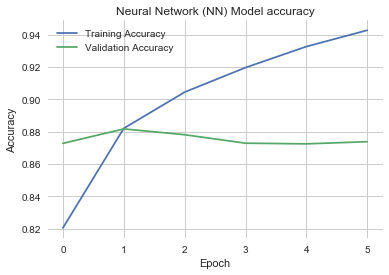

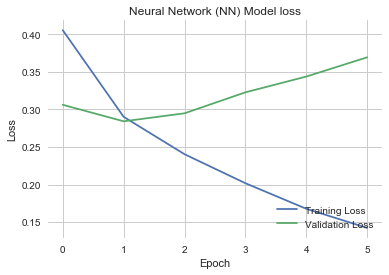

In [0]:
# Plot training & validation accuracy values
plt.plot(nn_model_fit.history['acc'])
plt.plot(nn_model_fit.history['val_acc'])
plt.title('Neural Network (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(nn_model_fit.history['loss'])
plt.plot(nn_model_fit.history['val_loss'])
plt.title('Neural Network (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 2) Convolutional Neural Network (CNN)

In [0]:
CNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [0]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

CNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated CNN MODEL Architecture

In [0]:
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          25600000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 100)          51300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 100)          400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
__________

In [0]:
#plot the CNN model architecture

#plot_model(CNN_model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='CNN_model_plot.png')

In [0]:
CNN_model_fit = CNN_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 48s 3ms/step - loss: 0.5699 - acc: 0.8123 - mean_pred: 0.3700 - fmeasure: 0.7371 - precision: 0.7533 - auroc: 0.8292 - recall: 0.7290 - val_loss: 0.3480 - val_acc: 0.8532 - val_mean_pred: 0.3306 - val_fmeasure: 0.7648 - val_precision: 0.8926 - val_auroc: 0.8721 - val_recall: 0.6691
Epoch 2/15
14602/14602 [==============================] - 45s 3ms/step - loss: 0.3210 - acc: 0.8715 - mean_pred: 0.3652 - fmeasure: 0.8133 - precision: 0.8554 - auroc: 0.8881 - recall: 0.7772 - val_loss: 0.3074 - val_acc: 0.8758 - val_mean_pred: 0.3657 - val_fmeasure: 0.8161 - val_precision: 0.8660 - val_auroc: 0.8991 - val_recall: 0.7720
Epoch 3/15
14602/14602 [==============================] - 47s 3ms/step - loss: 0.2870 - acc: 0.8861 - mean_pred: 0.3627 - fmeasure: 0.8366 - precision: 0.8690 - auroc: 0.9074 - recall: 0.8091 - val_loss: 0.3068 - val_acc: 0.8802 - val_mean_pred: 0.3760 - val_fmeasure: 

### Evaluate the CNN Model accuracy of our trained model

In [0]:
CNN_train_score = CNN_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Train loss:', CNN_train_score[0])
print('Train accuracy:', CNN_train_score[1])

14602/14602 [==============================] - 8s 523us/step
Train loss: 0.1768637636227161
Train accuracy: 0.9471876304650239


### Evaluate the CNN accuracy base our test samples

In [0]:
CNN_test_score = CNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])

6234/6234 [==============================] - 4s 564us/step
Test Loss: 0.3263702568600183
Test Accuracy: 0.8635440514682002


In [0]:
#Predicting......
print('Predicting....')
y_pred = CNN_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
6234/6234 [==============================] - 4s 570us/step


### Plot Training & Validation Accuracy with the Loss values of the CNN Model

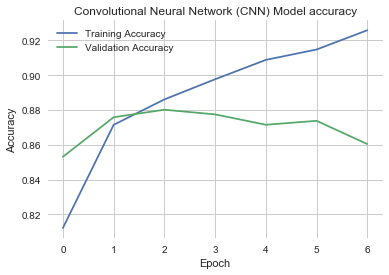

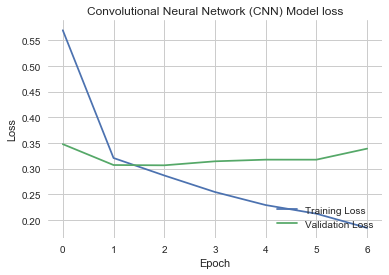

In [0]:
# Plot training & validation accuracy values
plt.plot(CNN_model_fit.history['acc'])
plt.plot(CNN_model_fit.history['val_acc'])
plt.title('Convolutional Neural Network (CNN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_model_fit.history['loss'])
plt.plot(CNN_model_fit.history['val_loss'])
plt.title('Convolutional Neural Network (CNN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 3) Recurrent Neural Networks (RNNs)

In [0]:
RNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [0]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

RNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated RNN MODEL Architecture

In [0]:
RNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 128)          25600000  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 128)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 200, 25)           3850      
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 25)           100       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 25)           0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1300      
__________

In [0]:
#plot the RNN model architecture

#plot_model(RNN_model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='CNN_model_plot.png')

In [0]:
RNN_model_fit = RNN_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 34s 2ms/step - loss: 0.4555 - acc: 0.7959 - mean_pred: 0.3623 - fmeasure: 0.7023 - precision: 0.7566 - auroc: 0.8270 - recall: 0.6634 - val_loss: 0.4118 - val_acc: 0.8257 - val_mean_pred: 0.4180 - val_fmeasure: 0.7573 - val_precision: 0.7531 - val_auroc: 0.8684 - val_recall: 0.7618
Epoch 2/15
14602/14602 [==============================] - 31s 2ms/step - loss: 0.3421 - acc: 0.8557 - mean_pred: 0.3625 - fmeasure: 0.7845 - precision: 0.8506 - auroc: 0.8829 - recall: 0.7300 - val_loss: 0.3748 - val_acc: 0.8676 - val_mean_pred: 0.3739 - val_fmeasure: 0.7935 - val_precision: 0.8946 - val_auroc: 0.8937 - val_recall: 0.7131
Epoch 3/15
14602/14602 [==============================] - 31s 2ms/step - loss: 0.3227 - acc: 0.8685 - mean_pred: 0.3593 - fmeasure: 0.8041 - precision: 0.8691 - auroc: 0.8999 - recall: 0.7506 - val_loss: 0.3679 - val_acc: 0.8723 - val_mean_pred: 0.3796 - val_fmeasure: 

### Evaluate the RNN Model accuracy of our trained model

In [0]:
RNN_train_score = RNN_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', RNN_train_score[0])
print('Train Accuracy:', RNN_train_score[1])

14602/14602 [==============================] - 4s 282us/step
Train Loss: 0.2496724655090693
Train Accuracy: 0.9148176438987067


### Evaluate the RNN accuracy base our test samples

In [0]:
RNN_test_score = RNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', RNN_test_score[0])
print('Test Accuracy:', RNN_test_score[1])

6234/6234 [==============================] - 2s 278us/step
Test Loss: 0.3268604185342559
Test Accuracy: 0.8665651084331124


### Plot Training & Validation Accuracy with the Loss values of the RNN Model

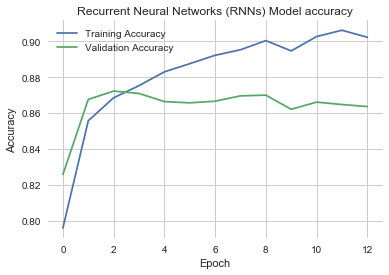

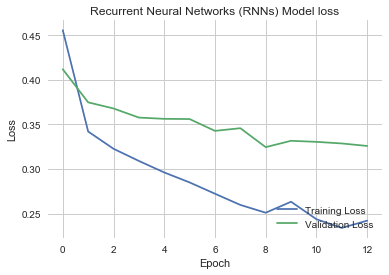

In [0]:
# Plot training & validation accuracy values
plt.plot(RNN_model_fit.history['acc'])
plt.plot(RNN_model_fit.history['val_acc'])
plt.title('Recurrent Neural Networks (RNNs) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_model_fit.history['loss'])
plt.plot(RNN_model_fit.history['val_loss'])
plt.title('Recurrent Neural Networks (RNNs) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 4) Long Short-Term Memory (LSTM)

In [0]:
LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [0]:
LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])
LSTM_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 128)          25600000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 25)           15400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 25)           100       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 25)           0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                1300      
__________

In [0]:
#plot the RNN model architecture

#plot_model(LSTM_model, to_file='LSTM_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='LSTM_model_plot.png')

In [0]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 42s 3ms/step - loss: 0.3676 - acc: 0.8382 - mean_pred: 0.3643 - fmeasure: 0.7668 - precision: 0.8096 - auroc: 0.8617 - recall: 0.7341 - val_loss: 0.3399 - val_acc: 0.8749 - val_mean_pred: 0.3925 - val_fmeasure: 0.8155 - val_precision: 0.8770 - val_auroc: 0.9060 - val_recall: 0.7623
Epoch 2/15
14602/14602 [==============================] - 38s 3ms/step - loss: 0.2929 - acc: 0.8799 - mean_pred: 0.3621 - fmeasure: 0.8263 - precision: 0.8623 - auroc: 0.9168 - recall: 0.7945 - val_loss: 0.3193 - val_acc: 0.8784 - val_mean_pred: 0.3868 - val_fmeasure: 0.8257 - val_precision: 0.8595 - val_auroc: 0.9240 - val_recall: 0.7947
Epoch 3/15
14602/14602 [==============================] - 39s 3ms/step - loss: 0.2572 - acc: 0.8939 - mean_pred: 0.3606 - fmeasure: 0.8494 - precision: 0.8703 - auroc: 0.9301 - recall: 0.8307 - val_loss: 0.3386 - val_acc: 0.8556 - val_mean_pred: 0.4380 - val_fmeasure: 

### Evaluate the LSTM Model accuracy of our train and test accuracy

In [0]:
LSTM_train_score = LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])


LSTM_test_score = LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_test_score[0])
print('Train Accuracy:', LSTM_test_score[1])

14602/14602 [==============================] - 4s 292us/step
Train Loss: 0.1553223238768863
Train Accuracy: 0.9482833666273085
6234/6234 [==============================] - 2s 285us/step
Train Loss: 0.3252780488622009
Train Accuracy: 0.8661373423811025


### Plot Training & Validation Accuracy with the Loss values of the LSTM Model

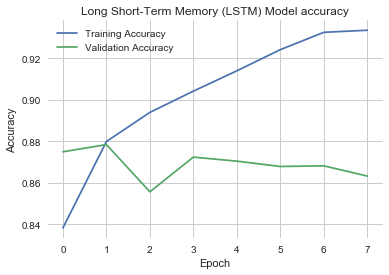

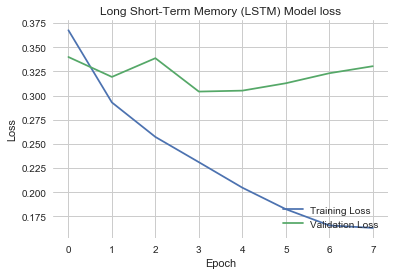

In [0]:
# Plot training & validation accuracy values
plt.plot(LSTM_model_fit.history['acc'])
plt.plot(LSTM_model_fit.history['val_acc'])
plt.title('Long Short-Term Memory (LSTM) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training<<<<<<<<<<<<<<<<<<<<l & validation loss values
plt.plot(LSTM_model_fit.history['loss'])
plt.plot(LSTM_model_fit.history['val_loss'])
plt.title('Long Short-Term Memory (LSTM) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 5) Bidirectional Long Short_Term Memory (Bidirectional LSTM) 

In [0]:
Bil_LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [0]:
Bil_LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated Bidirectional LSTM

In [0]:
Bil_LSTM_model.summary()

#plot the RNN model architecture
#plot_model(Bil_LSTM_model, to_file='Bil_LSTM_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='Bil_LSTM_model_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          25600000  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 50)           30800     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 50)           200       
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
__________

In [0]:
Bil_LSTM_model_fit = Bil_LSTM_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 67s 5ms/step - loss: 0.3591 - acc: 0.8469 - mean_pred: 0.3638 - fmeasure: 0.7768 - precision: 0.8332 - auroc: 0.8784 - recall: 0.7400 - val_loss: 0.3474 - val_acc: 0.8680 - val_mean_pred: 0.4137 - val_fmeasure: 0.8149 - val_precision: 0.8158 - val_auroc: 0.9103 - val_recall: 0.8144
Epoch 2/15
14602/14602 [==============================] - 63s 4ms/step - loss: 0.2786 - acc: 0.8868 - mean_pred: 0.3630 - fmeasure: 0.8367 - precision: 0.8732 - auroc: 0.9209 - recall: 0.8044 - val_loss: 0.3075 - val_acc: 0.8832 - val_mean_pred: 0.3764 - val_fmeasure: 0.8331 - val_precision: 0.8514 - val_auroc: 0.9288 - val_recall: 0.8157
Epoch 3/15
14602/14602 [==============================] - 65s 4ms/step - loss: 0.2410 - acc: 0.9026 - mean_pred: 0.3616 - fmeasure: 0.8623 - precision: 0.8808 - auroc: 0.9351 - recall: 0.8468 - val_loss: 0.3204 - val_acc: 0.8743 - val_mean_pred: 0.3904 - val_fmeasure: 

### Evaluate Bidirectional LSTM train and test score

In [0]:
#Train
Bil_LSTM_train_score = Bil_LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_LSTM_train_score[0])
print('Train Accuracy:', Bil_LSTM_train_score[1])

#Test
Bil_LSTM_test_score = Bil_LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_LSTM_test_score[0])
print('Test Accuracy:', Bil_LSTM_test_score[1])

14602/14602 [==============================] - 9s 596us/step
Train Loss: 0.11163328379319148
Train Accuracy: 0.9712368356840299
6234/6234 [==============================] - 4s 633us/step
Test Loss: 0.33699511553295003
Test Accuracy: 0.858705001111439


### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM Model

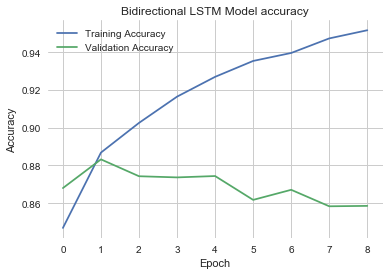

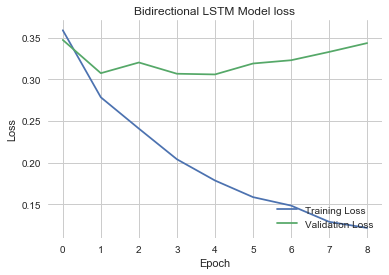

In [0]:
# Plot training & validation accuracy values
plt.plot(Bil_LSTM_model_fit.history['acc'])
plt.plot(Bil_LSTM_model_fit.history['val_acc'])
plt.title('Bidirectional LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_model_fit.history['loss'])
plt.plot(Bil_LSTM_model_fit.history['val_loss'])
plt.title('Bidirectional LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 6) Gated Recurrent Unit (GRU)

In [0]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim=max_features, output_dim=embedding_dims, trainable = False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
GRU_model = Model(sequence_input, preds)
GRU_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])


### Visualize the Orchestrated GRU MODEL Architecture

In [0]:
GRU_model.summary()

#plot the GRU model architecture

#plot_model(GRU_model, to_file='GRU_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='GRU_model_plot.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 200, 128)     25600000    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_5 (SpatialDro (None, 200, 128)     0           embedding_6[0][0]                
__________________________________________________________________________________________________
gru_1 (GRU)                     (None, 200, 128)     98688       spatial_dropout1d_5[0][0]        
__________________________________________________________________________________________________
conv1d_2 (

In [0]:

GRU_model_fit = GRU_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 75s 5ms/step - loss: 0.4434 - acc: 0.7788 - mean_pred: 0.3870 - fmeasure: 0.6949 - precision: 0.6978 - auroc: 0.8102 - recall: 0.6975 - val_loss: 0.3845 - val_acc: 0.7956 - val_mean_pred: 0.3622 - val_fmeasure: 0.6576 - val_precision: 0.8191 - val_auroc: 0.8619 - val_recall: 0.5497
Epoch 2/15
14602/14602 [==============================] - 95s 7ms/step - loss: 0.3950 - acc: 0.7979 - mean_pred: 0.3652 - fmeasure: 0.7187 - precision: 0.7231 - auroc: 0.8666 - recall: 0.7208 - val_loss: 0.3813 - val_acc: 0.8026 - val_mean_pred: 0.3558 - val_fmeasure: 0.6945 - val_precision: 0.7769 - val_auroc: 0.8705 - val_recall: 0.6284
Epoch 3/15
14602/14602 [==============================] - 103s 7ms/step - loss: 0.3909 - acc: 0.8048 - mean_pred: 0.3616 - fmeasure: 0.7156 - precision: 0.7614 - auroc: 0.8726 - recall: 0.6921 - val_loss: 0.3773 - val_acc: 0.8087 - val_mean_pred: 0.3631 - val_fmeasure:

### Evaluate the GRU Model train and test score

In [0]:
#Train
GRU_train_score = GRU_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_train_score[0])
print('Train Accuracy:', GRU_train_score[1])

#Test
GRU_test_score = GRU_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_test_score[0])
print('Test Accuracy:', GRU_test_score[1])

14602/14602 [==============================] - 37s 3ms/step
Train Loss: 0.32811733056969583
Train Accuracy: 0.8586837652774236
6234/6234 [==============================] - 15s 2ms/step
Test Loss: 0.3427480285390279
Test Accuracy: 0.8407122404253325


### Plot Training & Validation Accuracy with the Loss values of the GRU Model

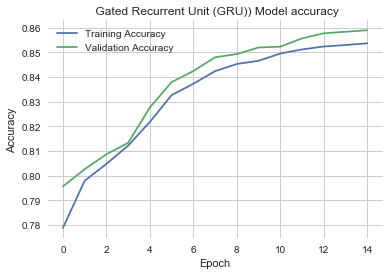

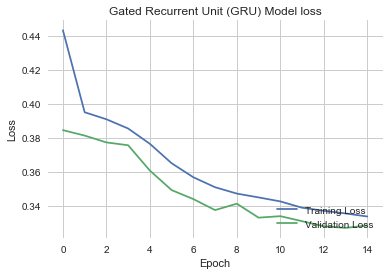

In [0]:
# Plot training & validation accuracy values
plt.plot(GRU_model_fit.history['acc'])
plt.plot(GRU_model_fit.history['val_acc'])
plt.title(' Gated Recurrent Unit (GRU)) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_model_fit.history['loss'])
plt.plot(GRU_model_fit.history['val_loss'])
plt.title('Gated Recurrent Unit (GRU) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 7 )  Bidirectional Gated Recurrent Unit (Bidirecitonal GRU)

In [0]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim=max_features, output_dim=embedding_dims, trainable = False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
Bil_GRU_model = Model(sequence_input, preds)
Bil_GRU_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])

### Visualize the Orchestrated Bidirectional GRU Model Architecture



In [0]:
Bil_GRU_model.summary()

#plot the GRU model architecture

#plot_model(Bil_GRU_model, to_file='Bil_GRU_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='Bil_GRU_model_plot.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 200, 128)     25600000    input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_6 (SpatialDro (None, 200, 128)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 200, 256)     197376      spatial_dropout1d_6[0][0]        
__________________________________________________________________________________________________
conv1d_3 (

In [0]:
Bil_GRU_model_fit = Bil_GRU_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Train on 14602 samples, validate on 1623 samples
Epoch 1/15
14602/14602 [==============================] - 355s 24ms/step - loss: 0.4320 - acc: 0.7901 - mean_pred: 0.3835 - fmeasure: 0.7108 - precision: 0.7189 - auroc: 0.8413 - recall: 0.7248 - val_loss: 0.3823 - val_acc: 0.7981 - val_mean_pred: 0.3604 - val_fmeasure: 0.7062 - val_precision: 0.7353 - val_auroc: 0.8689 - val_recall: 0.6798
Epoch 2/15
14602/14602 [==============================] - 423s 29ms/step - loss: 0.3902 - acc: 0.8078 - mean_pred: 0.3612 - fmeasure: 0.7222 - precision: 0.7622 - auroc: 0.8735 - recall: 0.6995 - val_loss: 0.3782 - val_acc: 0.8068 - val_mean_pred: 0.3803 - val_fmeasure: 0.7534 - val_precision: 0.6921 - val_auroc: 0.8770 - val_recall: 0.8273
Epoch 3/15
14602/14602 [==============================] - 467s 32ms/step - loss: 0.3746 - acc: 0.8247 - mean_pred: 0.3614 - fmeasure: 0.7444 - precision: 0.7940 - auroc: 0.8806 - recall: 0.7119 - val_loss: 0.3483 - val_acc: 0.8408 - val_mean_pred: 0.3636 - val_fmea

### Evaluate the GRU Model train and test score

In [0]:
#Train
Bil_GRU_train_score = Bil_GRU_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_GRU_train_score[0])
print('Train Accuracy:', Bil_GRU_train_score[1])

#Test
Bil_GRU_test_score = Bil_GRU_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_GRU_test_score[0])
print('Test Accuracy:', Bil_GRU_test_score[1])

14602/14602 [==============================] - 101s 7ms/step
Train Loss: 0.29912207272057334
Train Accuracy: 0.8737045438987493
6234/6234 [==============================] - 43s 7ms/step
Test Loss: 0.31512004053856574
Test Accuracy: 0.8547481846304554


### Plot Training & Validation Accuracy with the Loss values of the Bil GRU Model

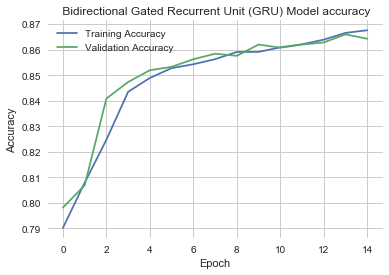

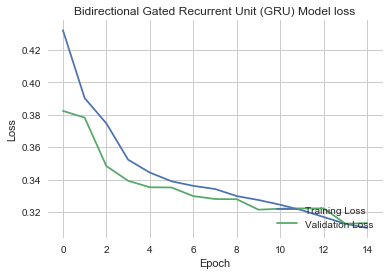

In [0]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_model_fit.history['acc'])
plt.plot(Bil_GRU_model_fit.history['val_acc'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_model_fit.history['loss'])
plt.plot(Bil_GRU_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Evaluation of Experiment Without Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model) 

In [0]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'AUC', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Neural Network', 'CNN', 'RNNs', 'LSTM', ' Bidirectional LSTM', 'GRU', 'Bidirectional GRU'],
                       [
                        #Loss Evaluation
                        round(np.max(nn_model_fit.history['loss']), 3), round(np.max(CNN_model_fit.history['loss']), 3), round(np.max(RNN_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_model_fit.history['loss']), 3), round(np.max(GRU_model_fit.history['loss']), 3),
                        round(np.max(Bil_GRU_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(nn_model_fit.history['acc']), 3), round(np.max(CNN_model_fit.history['acc']), 3), round(np.max(RNN_model_fit.history['acc']), 3), 
                        round(np.max(LSTM_model_fit.history['acc']), 3), round(np.max(Bil_LSTM_model_fit.history['acc']), 3), round(np.max(GRU_model_fit.history['acc']), 3),
                        round(np.max(Bil_GRU_model_fit.history['acc']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.max(nn_model_fit.history['mean_pred']), 3), round(np.max(CNN_model_fit.history['mean_pred']), 3), round(np.max(RNN_model_fit.history['mean_pred']), 3), 
                        round(np.max(LSTM_model_fit.history['mean_pred']), 3), round(np.max(Bil_LSTM_model_fit.history['mean_pred']), 3), round(np.max(GRU_model_fit.history['mean_pred']), 3),
                        round(np.max(Bil_GRU_model_fit.history['mean_pred']), 3)],
						
                        #F1-Measure Evaluation fmeasure
                        [round(np.max(nn_model_fit.history['fmeasure']), 3), round(np.max(CNN_model_fit.history['fmeasure']), 3), round(np.max(RNN_model_fit.history['fmeasure']), 3), 
                        round(np.max(LSTM_model_fit.history['fmeasure']), 3), round(np.max(Bil_LSTM_model_fit.history['fmeasure']), 3), round(np.max(GRU_model_fit.history['fmeasure']), 3),
                        round(np.max(Bil_GRU_model_fit.history['fmeasure']), 3)],
						             
                        #Precision Evaluation precision
                        [round(np.max(nn_model_fit.history['precision']), 3), round(np.max(CNN_model_fit.history['precision']), 3), round(np.max(RNN_model_fit.history['precision']), 3), 
                        round(np.max(LSTM_model_fit.history['precision']), 3), round(np.max(Bil_LSTM_model_fit.history['precision']), 3), round(np.max(GRU_model_fit.history['precision']), 3),
                        round(np.max(Bil_GRU_model_fit.history['precision']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.max(nn_model_fit.history['auroc']), 3), round(np.max(CNN_model_fit.history['auroc']), 3), round(np.max(RNN_model_fit.history['auroc']), 3), 
                        round(np.max(LSTM_model_fit.history['auroc']), 3), round(np.max(Bil_LSTM_model_fit.history['auroc']), 3), round(np.max(GRU_model_fit.history['auroc']), 3),
                        round(np.max(Bil_GRU_model_fit.history['auroc']), 3)],
                       
                        #Recall Evaluation
                        [round(np.max(nn_model_fit.history['recall']), 3), round(np.max(CNN_model_fit.history['recall']), 3), round(np.max(RNN_model_fit.history['recall']), 3), 
                        round(np.max(LSTM_model_fit.history['recall']), 3), round(np.max(Bil_LSTM_model_fit.history['recall']), 3), round(np.max(GRU_model_fit.history['recall']), 3),
                        round(np.max(Bil_GRU_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'multi-label_without_pre-trained_embedding_with the max of the evaluation matrics (per model) _table')

D:\Program Files\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Computing the mean average of the evaluation matrics (per model) 

In [0]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'AUC', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Neural Network', 'CNN', 'RNNs', 'LSTM', 'Bidirectional LSTM', 'GRU', 'Bidirectional GRU'],
                       [
                        #Loss Evaluation
                        round(np.mean(nn_model_fit.history['loss']), 3), round(np.mean(CNN_model_fit.history['loss']), 3), round(np.mean(RNN_model_fit.history['loss']), 3), 
                        round(np.mean(LSTM_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_model_fit.history['loss']), 3), round(np.mean(GRU_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.mean(nn_model_fit.history['acc']), 3), round(np.mean(CNN_model_fit.history['acc']), 3), round(np.mean(RNN_model_fit.history['acc']), 3), 
                        round(np.mean(LSTM_model_fit.history['acc']), 3), round(np.mean(Bil_LSTM_model_fit.history['acc']), 3), round(np.mean(GRU_model_fit.history['acc']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['acc']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.mean(nn_model_fit.history['mean_pred']), 3), round(np.mean(CNN_model_fit.history['mean_pred']), 3), round(np.mean(RNN_model_fit.history['mean_pred']), 3), 
                        round(np.mean(LSTM_model_fit.history['mean_pred']), 3), round(np.mean(Bil_LSTM_model_fit.history['mean_pred']), 3), round(np.mean(GRU_model_fit.history['mean_pred']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['mean_pred']), 3)],
						
                        #F1-Measure Evaluation fmeasure
                        [round(np.mean(nn_model_fit.history['fmeasure']), 3), round(np.mean(CNN_model_fit.history['fmeasure']), 3), round(np.mean(RNN_model_fit.history['fmeasure']), 3), 
                        round(np.mean(LSTM_model_fit.history['fmeasure']), 3), round(np.mean(Bil_LSTM_model_fit.history['fmeasure']), 3), round(np.mean(GRU_model_fit.history['fmeasure']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['fmeasure']), 3)],
						             
                        #Precision Evaluation precision
                        [round(np.mean(nn_model_fit.history['precision']), 3), round(np.mean(CNN_model_fit.history['precision']), 3), round(np.mean(RNN_model_fit.history['precision']), 3), 
                        round(np.mean(LSTM_model_fit.history['precision']), 3), round(np.mean(Bil_LSTM_model_fit.history['precision']), 3), round(np.mean(GRU_model_fit.history['precision']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['precision']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.mean(nn_model_fit.history['auroc']), 3), round(np.mean(CNN_model_fit.history['auroc']), 3), round(np.mean(RNN_model_fit.history['auroc']), 3), 
                        round(np.mean(LSTM_model_fit.history['auroc']), 3), round(np.mean(Bil_LSTM_model_fit.history['auroc']), 3), round(np.mean(GRU_model_fit.history['auroc']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['auroc']), 3)],
                       
                        #Recall Evaluation
                        [round(np.mean(nn_model_fit.history['recall']), 3), round(np.mean(CNN_model_fit.history['recall']), 3), round(np.mean(RNN_model_fit.history['recall']), 3), 
                        round(np.mean(LSTM_model_fit.history['recall']), 3), round(np.mean(Bil_LSTM_model_fit.history['recall']), 3), round(np.mean(GRU_model_fit.history['recall']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'multi-label_without_pre-trained_embedding_with the max of the evaluation matrics (per model) _table')

D:\Program Files\Anaconda\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [0]:
#Image('multi-label_with the mean average of the evaluation matrics (per model) _table.png')

### Score confusion table

In [0]:
# concat all training, validation and testing accuracy scores
NN_Accuracy = ['Neural Network', 
               np.mean(nn_model_fit.history['acc']), 
               np.mean(nn_model_fit.history['val_acc']), 
               nn_test_score[1]]

CNN_Accuracy = ['Convolutional Neural Network (CNN)', 
                np.mean(CNN_model_fit.history['acc']), 
                np.mean(CNN_model_fit.history['val_acc']), 
                CNN_test_score[1]]

RNN_Accuracy = ['Recurrent Neural Networks (RNNs)', 
                np.mean(RNN_model_fit.history['acc']), 
                np.mean(RNN_model_fit.history['val_acc']), 
                RNN_test_score[1]]

LSTM_Accuracy = ['LSTM', 
                  np.mean(LSTM_model_fit.history['acc']), 
                  np.mean(LSTM_model_fit.history['val_acc']), 
                  LSTM_test_score[1]]

Bidirectional_LSTM_Accuracy = ['Bidirectional LSTM', 
                    np.mean(Bil_LSTM_model_fit.history['acc']), 
                    np.mean(Bil_LSTM_model_fit.history['val_acc']), 
                    Bil_LSTM_test_score[1]]

GRU_Accuracy = ['GRU', 
                    np.mean(GRU_model_fit.history['acc']), 
                    np.mean(GRU_model_fit.history['val_acc']), 
                    GRU_test_score[1]]

Bidirectional_GRU_Accuracy = ['Bidirectional GRU', 
                    np.mean(Bil_GRU_model_fit.history['acc']), 
                    np.mean(Bil_GRU_model_fit.history['val_acc']), 
                    Bil_GRU_test_score[1]]


# create dataframe
experimentalResult = pd.DataFrame([NN_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([NN_Accuracy, CNN_Accuracy, RNN_Accuracy, LSTM_Accuracy, Bidirectional_LSTM_Accuracy, 
                                                GRU_Accuracy, Bidirectional_GRU_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult
print(experimentalResult)

                                    Training Accuracy  Validation Accuracy  \
Model                                                                        
Neural Network                               0.900335             0.875282   
Neural Network                               0.900335             0.875282   
Convolutional Neural Network (CNN)           0.888125             0.870346   
Recurrent Neural Networks (RNNs)             0.881513             0.863951   
LSTM                                         0.902588             0.868864   
Bidirectional LSTM                           0.917083             0.868841   
GRU                                          0.831982             0.837400   
Bidirectional GRU                            0.847833             0.849880   

                                    Testing Accuracy  
Model                                                 
Neural Network                              0.870201  
Neural Network                              0.870201  